In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [2]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()


picture_void
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.035_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.096_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.027_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.033_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.095_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.043_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.066_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.079_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.016_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.064_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.024_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.084_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.056_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.045_void_0.2.csv
/conten

In [5]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


x_health , y_health , z_health = [] , [] , []

for i in total_health_x_y_z:
  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])


x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.where(z_health < 0 , 0 , z_health )

TOTAL_X_health_vector = []
TOTAL_Target_X_health_vector = []

window_size = 2
for picture in z_health:
    picture_reshaped = picture.reshape(16, 3)  # 16 ردیف، هر ردیف 3 ستون (x,y,z)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        # ورودی = 3 ردیف پشت سر هم
        TOTAL_X_health_vector.append(picture_reshaped[i : i + window_size])   # (3,3)
        # خروجی = ردیف بعد از این 3 تایی
        TOTAL_Target_X_health_vector.append(picture_reshaped[i + window_size]) # (3,)

TOTAL_X_health_vector_array = np.array(TOTAL_X_health_vector).reshape(-1, window_size, 3)
TOTAL_Target_X_health_vector_array = np.array(TOTAL_Target_X_health_vector).reshape(-1, 3)

print(TOTAL_X_health_vector_array.shape)   # (N, 3, 3)
print(TOTAL_Target_X_health_vector_array.shape)  # (N, 3)

(5544, 2, 3)
(5544, 3)


In [6]:
z_health.shape

(396, 16, 3, 1)

In [7]:
reverse_total_health_x_y_z , reverse_label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      reverse_total_health_x_y_z.append(img)
      reverse_label_health.append(i)


rev_x_health , rev_y_health , rev_z_health = [] , [] , []

for i in reverse_total_health_x_y_z:
  rev_x_health.append(i['x'])
  rev_y_health.append(i['y'])
  rev_z_health.append(i['z'])


rev_x_health = np.array(rev_x_health).reshape(-1 , 16 , 3 , 1 )
rev_y_health = np.array(rev_y_health).reshape(-1 , 16 , 3 , 1 )
rev_z_health = np.array(rev_z_health).reshape(-1 , 16 , 3 , 1 )
rev_z_health = np.where(rev_z_health < 0 , 0 , rev_z_health )

rev_TOTAL_X_health_vector = []
rev_TOTAL_Target_X_health_vector = []

window_size = 2
for picture in rev_z_health:
    picture_reshaped = picture.reshape(16, 3)  # 16 ردیف، هر ردیف 3 ستون (x,y,z)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples,0,-1):
        # ورودی = 3 ردیف پشت سر هم
        rev_TOTAL_X_health_vector.append(picture_reshaped[-(i + window_size):-i])   # (3,3)
        # خروجی = ردیف بعد از این 3 تایی
        rev_TOTAL_Target_X_health_vector.append(picture_reshaped[-i]) # (3,)

rev_TOTAL_X_health_vector = np.array(rev_TOTAL_X_health_vector).reshape(-1, window_size, 3)
rev_TOTAL_Target_X_health_vector = np.array(rev_TOTAL_Target_X_health_vector).reshape(-1, 3)

print(rev_TOTAL_X_health_vector.shape)   # (N, 3, 3)
print(rev_TOTAL_Target_X_health_vector.shape)  # (N, 3)

(5544, 2, 3)
(5544, 3)


In [8]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_health_vector_array,TOTAL_Target_X_health_vector_array , test_size=0.3 , random_state = 42 )

In [9]:
rev_x_train , rev_x_test , rev_y_train , rev_y_test = train_test_split(rev_TOTAL_X_health_vector,rev_TOTAL_Target_X_health_vector , test_size=0.3 , random_state = 42 )

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model_forward = Sequential([
    # لایه LSTM: 4 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(16, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model_forward.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model_forward.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model_forward.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    # callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model_forward.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,499 (72.26 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 - 5s - 95ms/step - loss: 2.0999 - mse: 2.0999 - val_loss: 0.0791 - val_mse: 0.0791
Epoch 2/50
49/49 - 0s - 6ms/step - loss: 0.0905 - mse: 0.0905 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3/50
49/49 - 1s - 12ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 4/50
49/49 - 0s - 6ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 5/50
49/49 - 0s - 7ms/step - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 6/50
49/49 - 0s - 6ms/step - loss: 0.0513 - mse: 0.0513 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 7/50
49/49 - 0s - 8ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 8/50
49/49 - 0s - 6ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 9/50
49/49 - 0s - 6ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 10/50
49/49 - 0s - 6ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 1

In [11]:

# ————— تعریف مدل —————
model_backward = Sequential([
    # لایه LSTM: 4 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(16, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model_backward.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model_backward.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model_backward.fit(
    rev_x_train, rev_y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    # callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = rev_x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model_forward.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,499 (72.26 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 - 2s - 35ms/step - loss: 1.8443 - mse: 1.8443 - val_loss: 0.1250 - val_mse: 0.1250
Epoch 2/50
49/49 - 0s - 6ms/step - loss: 0.0862 - mse: 0.0862 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 3/50
49/49 - 0s - 6ms/step - loss: 0.0628 - mse: 0.0628 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 4/50
49/49 - 0s - 6ms/step - loss: 0.0550 - mse: 0.0550 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 5/50
49/49 - 0s - 6ms/step - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 6/50
49/49 - 0s - 6ms/step - loss: 0.0502 - mse: 0.0502 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 7/50
49/49 - 0s - 6ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 8/50
49/49 - 0s - 6ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 9/50
49/49 - 0s - 6ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 10/50
49/49 - 0s - 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 11

In [12]:
Total_Feature = []
Total_Label_Feature = []

In [13]:
TOTAL_ERROR_PLAIN_HEALTH = []
TOTAL_SEQ_ERROR_HEALTH = []
Total_Feature = []
Total_Label_Feature = []

window_size = 2
tail_size = 5         # تعداد فریم‌های انتهایی
tail_weight = 3.0     # وزن برای خطای انتهایی
slope_weight = 2.0    # وزن برای شیب انتهایی

for picture in z_health[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    # ساخت دیتای ورودی/خروجی
    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی کل توالی
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, window_size, 3)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)


    diff_error = (total_y_pre - new_sample_y_array) ** 2
    TOTAL_ERROR_PLAIN_HEALTH.append(diff_error)
    # -------- محاسبه خطا --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)

    # -------- محاسبه خطای انتهایی --------
    # tail_errors = errors[-tail_size:] if tail_size <= len(errors) else errors
    # tail_mean = np.mean(tail_errors)

    # -------- شیب خطا --------
    # if len(tail_errors) > 1:
    #     slope = tail_errors[-1] - tail_errors[0]
    #     slope_penalty = max(slope, 0.0)
    # else:
    #     slope_penalty = 0.0

    # -------- محاسبه augmented_mse --------
    # augmented_mse = avg_error + tail_weight * tail_mean + slope_weight * slope_penalty

    # # -------- استخراج ویژگی‌ها --------
    features = {
        "mse": mse ,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error),

    }

    Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],

    ])
    Total_Label_Feature.append('0')


In [14]:
rev_TOTAL_ERROR_PLAIN_HEALTH = []
rev_TOTAL_SEQ_ERROR_HEALTH = []
rev_Total_Feature = []
rev_Total_Label_Feature = []

window_size = 2
tail_size = 5         # تعداد فریم‌های انتهایی
tail_weight = 3.0     # وزن برای خطای انتهایی
slope_weight = 2.0    # وزن برای شیب انتهایی

for picture in rev_z_health[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    # ساخت دیتای ورودی/خروجی
    new_sample_x, new_sample_y = [], []
    for i in range(n_samples,0,-1):
        new_sample_x.append(picture_reshaped[-(i + window_size):-i])
        new_sample_y.append(picture_reshaped[-i])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی کل توالی
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, window_size, 3)
        y_pre = model_backward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)


    diff_error = (total_y_pre - new_sample_y_array) ** 2
    rev_TOTAL_ERROR_PLAIN_HEALTH.append(diff_error)
    # -------- محاسبه خطا --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)

    # -------- محاسبه خطای انتهایی --------
    # tail_errors = errors[-tail_size:] if tail_size <= len(errors) else errors
    # tail_mean = np.mean(tail_errors)

    # -------- شیب خطا --------
    # if len(tail_errors) > 1:
    #     slope = tail_errors[-1] - tail_errors[0]
    #     slope_penalty = max(slope, 0.0)
    # else:
    #     slope_penalty = 0.0

    # -------- محاسبه augmented_mse --------
    # augmented_mse = avg_error + tail_weight * tail_mean + slope_weight * slope_penalty

    # # -------- استخراج ویژگی‌ها --------
    features = {
        "mse": mse ,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error),

    }

    rev_Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],

    ])
    rev_Total_Label_Feature.append('0')


In [15]:
TOTAL_ERROR_PLAIN_ALPHA = []
total_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_alpha':
            total_alpha_x_y_z.append(img)
            label_alpha.append(i)

x_alpha , y_alpha , z_alpha = [] , [] , []
for i in total_alpha_x_y_z:
    x_alpha.append(i['x'])
    y_alpha.append(i['y'])
    z_alpha.append(i['z'])

x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.where(z_alpha < 0 , 0 , z_alpha )

TOTAL_SEQ_ERROR_ALPHA = []
r = 0

for picture in z_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)
    diff_error = (total_y_pre - new_sample_y_array) ** 2
    TOTAL_ERROR_PLAIN_ALPHA.append(diff_error)
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)

    # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)


    # # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)

    # avg_error = np.mean(errors)       # میانگین کل
    # last_error = errors[-1]           # آخرین فریم
    # tail_mean = np.mean(errors[-3:])
    # tail_size = 5
    # tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    # ratio_tail = tail_mean / (avg_error + 1e-12)

    # threshold_factor = 1.5

    # penalty = 0.0
    # multiplier = 5.0

    # clip_penalty=True
    # max_penalty=0.5

    # if ratio_tail > threshold_factor:
    #     # گزینه ساده: جریمه متناسب با اختلاف
    #     penalty = multiplier * (tail_mean - avg_error)
    #     # یا می‌توان از درصدی از mean_error استفاده کرد:
    #     # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

    #     if clip_penalty:
    #         penalty = np.clip(penalty, 0.0, max_penalty)

    # # مقدار MSE پایه (میانگین خطا)
    # base_mse = avg_error

    # # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    # augmented_mse = base_mse + penalty








    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }

    Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    Total_Label_Feature.append('1')

    r += 1
    del new_sample_x, new_sample_y, new_sample_x_array, new_sample_y_array, total_y_pre, picture_reshaped

print("تعداد تصاویر پردازش‌شده:", r)
# print("میانگین خطای توالی معیوب α:", np.mean(TOTAL_SEQ_ERROR_ALPHA))


تعداد تصاویر پردازش‌شده: 99


In [16]:
rev_TOTAL_ERROR_PLAIN_ALPHA = []
rev_total_alpha_x_y_z , rev_label_alpha = [] , []
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_alpha':
            rev_total_alpha_x_y_z.append(img)
            rev_label_alpha.append(i)

rev_x_alpha , rev_y_alpha , rev_z_alpha = [] , [] , []
for i in rev_total_alpha_x_y_z:
    rev_x_alpha.append(i['x'])
    rev_y_alpha.append(i['y'])
    rev_z_alpha.append(i['z'])

rev_x_alpha = np.array(rev_x_alpha).reshape(-1 , 16 , 3 , 1 )
rev_y_alpha = np.array(rev_y_alpha).reshape(-1 , 16 , 3 , 1 )
rev_z_alpha = np.array(rev_z_alpha).reshape(-1 , 16 , 3 , 1 )
rev_z_alpha = np.where(rev_z_alpha < 0 , 0 , rev_z_alpha )

rev_TOTAL_SEQ_ERROR_ALPHA = []
r = 0

for picture in rev_z_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples,0,-1):
        new_sample_x.append(picture_reshaped[-(i + window_size):-i])
        new_sample_y.append(picture_reshaped[-i])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model_backward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)
    diff_error = (total_y_pre - new_sample_y_array) ** 2
    rev_TOTAL_ERROR_PLAIN_ALPHA.append(diff_error)
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)

    # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)


    # # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)

    # avg_error = np.mean(errors)       # میانگین کل
    # last_error = errors[-1]           # آخرین فریم
    # tail_mean = np.mean(errors[-3:])
    # tail_size = 5
    # tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    # ratio_tail = tail_mean / (avg_error + 1e-12)

    # threshold_factor = 1.5

    # penalty = 0.0
    # multiplier = 5.0

    # clip_penalty=True
    # max_penalty=0.5

    # if ratio_tail > threshold_factor:
    #     # گزینه ساده: جریمه متناسب با اختلاف
    #     penalty = multiplier * (tail_mean - avg_error)
    #     # یا می‌توان از درصدی از mean_error استفاده کرد:
    #     # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

    #     if clip_penalty:
    #         penalty = np.clip(penalty, 0.0, max_penalty)

    # # مقدار MSE پایه (میانگین خطا)
    # base_mse = avg_error

    # # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    # augmented_mse = base_mse + penalty








    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }

    rev_Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    rev_Total_Label_Feature.append('1')

    r += 1
    del new_sample_x, new_sample_y, new_sample_x_array, new_sample_y_array, total_y_pre, picture_reshaped

print("تعداد تصاویر پردازش‌شده:", r)
# print("میانگین خطای توالی معیوب α:", np.mean(TOTAL_SEQ_ERROR_ALPHA))


تعداد تصاویر پردازش‌شده: 99


In [17]:
TOTAL_ERROR_PLAIN_VOID = []
total_void_x_y_z, label_void = [], []
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void':
            total_void_x_y_z.append(img)
            label_void.append(i)

x_void, y_void, z_void = [], [], []
for i in total_void_x_y_z:
    x_void.append(i['x'])
    y_void.append(i['y'])
    z_void.append(i['z'])

x_void = np.array(x_void).reshape(-1, 16, 3, 1)
y_void = np.array(y_void).reshape(-1, 16, 3, 1)
z_void = np.array(z_void).reshape(-1, 16, 3, 1)
z_void = np.where(z_void<0,0,z_void)

TOTAL_SEQ_ERROR_VOID = []

for picture in z_void[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    diff_error = (total_y_pre - new_sample_y_array ) ** 2
    TOTAL_ERROR_PLAIN_VOID.append(diff_error)
    mse = np.sum(diff_error)

    # # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
    # avg_error = np.mean(errors)       # میانگین کل
    # last_error = errors[-1]           # آخرین فریم
    # tail_mean = np.mean(errors[-3:])
    # tail_size = 5
    # tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    # ratio_tail = tail_mean / (avg_error + 1e-12)

    # threshold_factor = 1.5

    # penalty = 0.0
    # multiplier = 5.0

    # clip_penalty=True
    # max_penalty=0.5

    # if ratio_tail > threshold_factor:
    #     # گزینه ساده: جریمه متناسب با اختلاف
    #     penalty = multiplier * (tail_mean - avg_error)
    #     # یا می‌توان از درصدی از mean_error استفاده کرد:
    #     # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

    #     if clip_penalty:
    #         penalty = np.clip(penalty, 0.0, max_penalty)

    # # مقدار MSE پایه (میانگین خطا)
    # base_mse = avg_error

    # # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    # augmented_mse = base_mse + penalty






    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }
    Total_Feature.append([
        features["mse"],
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    Total_Label_Feature.append('2')

# print("میانگین خطای توالی معیوب void:", np.mean(TOTAL_SEQ_ERROR_VOID))

In [18]:
rev_TOTAL_ERROR_PLAIN_VOID = []
rev_total_void_x_y_z, rev_label_void = [], []
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void':
            rev_total_void_x_y_z.append(img)
            rev_label_void.append(i)

rev_x_void, rev_y_void, rev_z_void = [], [], []
for i in rev_total_void_x_y_z:
    rev_x_void.append(i['x'])
    rev_y_void.append(i['y'])
    rev_z_void.append(i['z'])

rev_x_void = np.array(rev_x_void).reshape(-1, 16, 3, 1)
rev_y_void = np.array(rev_y_void).reshape(-1, 16, 3, 1)
rev_z_void = np.array(rev_z_void).reshape(-1, 16, 3, 1)
rev_z_void = np.where(rev_z_void<0,0,rev_z_void)

TOTAL_SEQ_ERROR_VOID = []

for picture in rev_z_void[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples,0,-1):
        new_sample_x.append(picture_reshaped[-(i + window_size):-i])
        new_sample_y.append(picture_reshaped[-i])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    diff_error = (total_y_pre - new_sample_y_array) ** 2
    rev_TOTAL_ERROR_PLAIN_VOID.append(diff_error)
    mse = np.sum(diff_error)

    # # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
    # avg_error = np.mean(errors)       # میانگین کل
    # last_error = errors[-1]           # آخرین فریم
    # tail_mean = np.mean(errors[-3:])
    # tail_size = 5
    # tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    # ratio_tail = tail_mean / (avg_error + 1e-12)

    # threshold_factor = 1.5

    # penalty = 0.0
    # multiplier = 5.0

    # clip_penalty=True
    # max_penalty=0.5

    # if ratio_tail > threshold_factor:
    #     # گزینه ساده: جریمه متناسب با اختلاف
    #     penalty = multiplier * (tail_mean - avg_error)
    #     # یا می‌توان از درصدی از mean_error استفاده کرد:
    #     # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

    #     if clip_penalty:
    #         penalty = np.clip(penalty, 0.0, max_penalty)

    # # مقدار MSE پایه (میانگین خطا)
    # base_mse = avg_error

    # # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    # augmented_mse = base_mse + penalty






    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }
    rev_Total_Feature.append([
        features["mse"],
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    rev_Total_Label_Feature.append('2')

# print("میانگین خطای توالی معیوب void:", np.mean(TOTAL_SEQ_ERROR_VOID))

In [45]:
# rev_TOTAL_ERROR_PLAIN_VOID = []
# rev_total_void_x_y_z, rev_label_void = [], []
# for i in store_data_set:
#     for img in store_data_set[i]:
#         if i == 'picture_void_alpha':
#             rev_total_void_x_y_z.append(img)
#             rev_label_void.append(i)

# rev_x_void, rev_y_void, rev_z_void = [], [], []
# for i in rev_total_void_x_y_z:
#     rev_x_void.append(i['x'])
#     rev_y_void.append(i['y'])
#     rev_z_void.append(i['z'])

# rev_x_void = np.array(rev_x_void).reshape(-1, 16, 3, 1)
# rev_y_void = np.array(rev_y_void).reshape(-1, 16, 3, 1)
# rev_z_void = np.array(rev_z_void).reshape(-1, 16, 3, 1)
# rev_z_void = np.where(rev_z_void<0,0,rev_z_void)

# TOTAL_SEQ_ERROR_VOID = []

# for picture in rev_z_void[::4]:
#     picture_reshaped = picture.reshape(16, 3)
#     n_samples = picture_reshaped.shape[0] - window_size

#     new_sample_x, new_sample_y = [], []
#     for i in range(n_samples,0,-1):
#         new_sample_x.append(picture_reshaped[-(i + window_size):-i])
#         new_sample_y.append(picture_reshaped[-i])

#     new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
#     new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

#     total_y_pre = []
#     for i in new_sample_x_array:
#         t = np.expand_dims(i, axis=0)
#         y_pre = model_backward.predict(t, verbose=0)
#         total_y_pre.append(y_pre[0])
#     total_y_pre = np.array(total_y_pre)

#     diff_error = (total_y_pre - new_sample_y_array) ** 2
#     rev_TOTAL_ERROR_PLAIN_VOID.append(diff_error)
#     mse = np.sum(diff_error)

#     # # -------- خطای وزن‌دار --------
#     # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
#     # avg_error = np.mean(errors)       # میانگین کل
#     # last_error = errors[-1]           # آخرین فریم
#     # tail_mean = np.mean(errors[-3:])
#     # tail_size = 5
#     # tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
#     # ratio_tail = tail_mean / (avg_error + 1e-12)

#     # threshold_factor = 1.5

#     # penalty = 0.0
#     # multiplier = 5.0

#     # clip_penalty=True
#     # max_penalty=0.5

#     # if ratio_tail > threshold_factor:
#     #     # گزینه ساده: جریمه متناسب با اختلاف
#     #     penalty = multiplier * (tail_mean - avg_error)
#     #     # یا می‌توان از درصدی از mean_error استفاده کرد:
#     #     # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

#     #     if clip_penalty:
#     #         penalty = np.clip(penalty, 0.0, max_penalty)

#     # # مقدار MSE پایه (میانگین خطا)
#     # base_mse = avg_error

#     # # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
#     # augmented_mse = base_mse + penalty






#     features = {
#         "mse":mse,
#         "mean": avg_error,
#         "max": np.max(diff_error),
#         "std": np.std(diff_error),
#         "last": diff_error[-1],
#         "min":np.min(diff_error)
#     }
#     rev_Total_Feature.append([
#         features["mse"],
#         features["mean"],
#         features["max"],
#         features["std"],
#         features["last"],
#         features["min"],
#     ])
#     rev_Total_Label_Feature.append('2')

# # print("میانگین خطای توالی معیوب void:", np.mean(TOTAL_SEQ_ERROR_VOID))

In [19]:
TOTAL_ERROR_PLAIN_VOID_ALPHA = []
total_void_alpha_x_y_z, label_void_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void_alpha':
            total_void_alpha_x_y_z.append(img)
            label_void_alpha.append(i)

x_void_alpha, y_void_alpha, z_void_alpha = [], [], []

for i in total_void_alpha_x_y_z:
    x_void_alpha.append(i['x'])
    y_void_alpha.append(i['y'])
    z_void_alpha.append(i['z'])

x_void_alpha = np.array(x_void_alpha).reshape(-1, 16, 3, 1)
y_void_alpha = np.array(y_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.array(z_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.where(z_void_alpha<0,0,z_void_alpha)

# ---------------------------
# ساخت دیتاست ورودی/خروجی
# ---------------------------
TOTAL_X_vector_void_alpha = []
TOTAL_Y_vector_void_alpha = []

window_size = 2   # سه ردیف ورودی

for picture in z_void_alpha:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        TOTAL_X_vector_void_alpha.append(picture_reshaped[i : i + window_size])   # (3,3)
        TOTAL_Y_vector_void_alpha.append(picture_reshaped[i + window_size])       # (3,)

TOTAL_X_vector_void_alpha_array = np.array(TOTAL_X_vector_void_alpha).reshape(-1, window_size, 3)
TOTAL_Y_vector_void_alpha_array = np.array(TOTAL_Y_vector_void_alpha).reshape(-1, 3)

# ---------------------------
# پیش‌بینی و محاسبه خطا
# ---------------------------
r = 0
TOTAL_MSE_void_alpha = []

for picture in z_void_alpha[::4]:
    new_sample_x, new_sample_y = [], []

    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])   # (3,3)
        new_sample_y.append(picture_reshaped[i + window_size])       # (3,)

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, 3, 3)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    diff_error = (total_y_pre - new_sample_y_array) ** 2
    TOTAL_ERROR_PLAIN_VOID_ALPHA.append(diff_error)
    mse = np.sum(diff_error)
    # ---------------------------
    # محاسبه خطا (MAE یا MSE)
    # ---------------------------

#     errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)

#     avg_error = np.mean(errors)       # میانگین کل
#     last_error = errors[-1]           # آخرین فریم
#     tail_mean = np.mean(errors[-3:])
#     tail_size = 5
#     tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
#     ratio_tail = tail_mean / (avg_error + 1e-12)

#     threshold_factor = 1.5

#     penalty = 0.0
#     multiplier = 5.0

#     clip_penalty=True
#     max_penalty=0.5

#     if ratio_tail > threshold_factor:
#         # گزینه ساده: جریمه متناسب با اختلاف
#         penalty = multiplier * (tail_mean - avg_error)
#         # یا می‌توان از درصدی از mean_error استفاده کرد:
#         # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

#         if clip_penalty:
#             penalty = np.clip(penalty, 0.0, max_penalty)

#     # مقدار MSE پایه (میانگین خطا)
#     base_mse = avg_error

#     # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
#     augmented_mse = base_mse + penalty



    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }
    Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    Total_Label_Feature.append('3')

    r += 1
    if r == 200:
        break

print("تعداد تصاویر پردازش‌شده:", r)


تعداد تصاویر پردازش‌شده: 99


In [20]:
rev_TOTAL_ERROR_PLAIN_VOID_ALPHA = []
rev_total_void_alpha_x_y_z, rev_label_void_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void_alpha':
            rev_total_void_alpha_x_y_z.append(img)
            rev_label_void_alpha.append(i)

rev_x_void_alpha, rev_y_void_alpha, rev_z_void_alpha = [], [], []

for i in total_void_alpha_x_y_z:
    rev_x_void_alpha.append(i['x'])
    rev_y_void_alpha.append(i['y'])
    rev_z_void_alpha.append(i['z'])

rev_x_void_alpha = np.array(rev_x_void_alpha).reshape(-1, 16, 3, 1)
rev_y_void_alpha = np.array(rev_y_void_alpha).reshape(-1, 16, 3, 1)
rev_z_void_alpha = np.array(rev_z_void_alpha).reshape(-1, 16, 3, 1)
rev_z_void_alpha = np.where(rev_z_void_alpha<0,0,rev_z_void_alpha)

# ---------------------------
# ساخت دیتاست ورودی/خروجی
# ---------------------------
TOTAL_X_vector_void_alpha = []
TOTAL_Y_vector_void_alpha = []

window_size = 2   # سه ردیف ورودی

# for picture in z_void_alpha:
#     picture_reshaped = picture.reshape(16, 3)
#     n_samples = picture_reshaped.shape[0] - window_size
#     for i in range(n_samples,0,-1):
#         TOTAL_X_vector_void_alpha.append(picture_reshaped[-(i + window_size):-i])   # (3,3)
#         TOTAL_Y_vector_void_alpha.append(picture_reshaped[-i])       # (3,)

# TOTAL_X_vector_void_alpha_array = np.array(TOTAL_X_vector_void_alpha).reshape(-1, window_size, 3)
# TOTAL_Y_vector_void_alpha_array = np.array(TOTAL_Y_vector_void_alpha).reshape(-1, 3)

# ---------------------------
# پیش‌بینی و محاسبه خطا
# ---------------------------
r = 0
TOTAL_MSE_void_alpha = []

for picture in rev_z_void_alpha[::4]:
    new_sample_x, new_sample_y = [], []

    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples,0,-1):
        new_sample_x.append(picture_reshaped[-(i + window_size):-i])   # (3,3)
        new_sample_y.append(picture_reshaped[-i])       # (3,)

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, 3, 3)
        y_pre = model_backward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    diff_error = (total_y_pre - new_sample_y_array) ** 2
    rev_TOTAL_ERROR_PLAIN_VOID_ALPHA.append(diff_error)
    mse = np.sum(diff_error)
    # ---------------------------
    # محاسبه خطا (MAE یا MSE)
    # ---------------------------

#     errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)

#     avg_error = np.mean(errors)       # میانگین کل
#     last_error = errors[-1]           # آخرین فریم
#     tail_mean = np.mean(errors[-3:])
#     tail_size = 5
#     tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
#     ratio_tail = tail_mean / (avg_error + 1e-12)

#     threshold_factor = 1.5

#     penalty = 0.0
#     multiplier = 5.0

#     clip_penalty=True
#     max_penalty=0.5

#     if ratio_tail > threshold_factor:
#         # گزینه ساده: جریمه متناسب با اختلاف
#         penalty = multiplier * (tail_mean - avg_error)
#         # یا می‌توان از درصدی از mean_error استفاده کرد:
#         # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

#         if clip_penalty:
#             penalty = np.clip(penalty, 0.0, max_penalty)

#     # مقدار MSE پایه (میانگین خطا)
#     base_mse = avg_error

#     # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
#     augmented_mse = base_mse + penalty



    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }
    rev_Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    rev_Total_Label_Feature.append('3')

    r += 1
    if r == 200:
        break

print("تعداد تصاویر پردازش‌شده:", r)


تعداد تصاویر پردازش‌شده: 99


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

def multi_plot_error_surface(error_surface1 , error_surface2 , error_surface3 , error_surface4 , title=["health","alpha","void","void_alpha"]):
    nx, ny = error_surface1.shape

    x = np.arange(nx)   # طول (0..13)
    y = np.arange(ny)   # عرض (0..2)

    X, Y = np.meshgrid(x, y, indexing="ij")
    Z1 = error_surface1
    Z2 = error_surface2
    Z3 = error_surface3
    Z4 = error_surface4

    # نقاط اولیه
    points = np.column_stack([X.ravel(), Y.ravel()])
    values1 = Z1.ravel()
    values2 = Z2.ravel()
    values3 = Z3.ravel()
    values4 = Z4.ravel()

    # شبکه ریزتر برای نرمی
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    XI, YI = np.meshgrid(xi, yi)

    ZI = griddata(points, values1, (XI, YI), method='cubic')
    ZII = griddata(points, values2, (XI, YI), method='cubic')
    ZIII = griddata(points, values3, (XI, YI), method='cubic')
    ZIIII = griddata(points, values4, (XI, YI), method='cubic')

    fig = plt.figure(figsize=(12,20))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    ax3 = fig.add_subplot(221, projection='3d')
    ax4 = fig.add_subplot(222, projection='3d')

    surf1 = ax1.plot_surface(XI, YI, ZI, cmap="viridis", linewidth=0, antialiased=True)
    surf2 = ax2.plot_surface(XI, YI, ZII, cmap="viridis", linewidth=0, antialiased=True)
    surf3 = ax3.plot_surface(XI, YI, ZIII, cmap="viridis", linewidth=0, antialiased=True)
    surf4 = ax4.plot_surface(XI, YI, ZIIII, cmap="viridis", linewidth=0, antialiased=True)

    ax1.set_xlabel("Length (x)")
    ax1.set_ylabel("Width (y)")
    ax1.set_zlabel("Error (z)")
    ax1.set_title(title[0])

    ax2.set_xlabel("Length (x)")
    ax2.set_ylabel("Width (y)")
    ax2.set_zlabel("Error (z)")
    ax2.set_title(title[1])

    ax3.set_xlabel("Length (x)")
    ax3.set_ylabel("Width (y)")
    ax3.set_zlabel("Error (z)")
    ax3.set_title(title[2])

    ax4.set_xlabel("Length (x)")
    ax4.set_ylabel("Width (y)")
    ax4.set_zlabel("Error (z)")
    ax4.set_title(title[3])



    fig.colorbar(surf1, shrink=0.5, aspect=5)
    fig.colorbar(surf2, shrink=0.5, aspect=5)
    fig.colorbar(surf3, shrink=0.5, aspect=5)
    fig.colorbar(surf4, shrink=0.5, aspect=5)



    plt.show()

    print("*************** 2D ***************")

    fig2 = plt.figure(figsize=(10,10))
    ax21 = fig2.add_subplot(121)
    ax22 = fig2.add_subplot(122)
    ax23 = fig2.add_subplot(221)
    ax24 = fig2.add_subplot(222)

    error_surface1=geek.rot90(error_surface1)
    ax21.imshow(error_surface1)
    ax21.set_title("health")
    error_surface2=geek.rot90(error_surface2)
    ax22.imshow(error_surface2)
    ax22.set_title("alpha")
    error_surface3=geek.rot90(error_surface3)
    ax23.imshow(error_surface3)
    ax23.set_title("void")
    error_surface4=geek.rot90(error_surface4)
    ax24.imshow(error_surface4)
    ax24.set_title("void-alpha")


    plt.show()


In [22]:
import numpy as geek

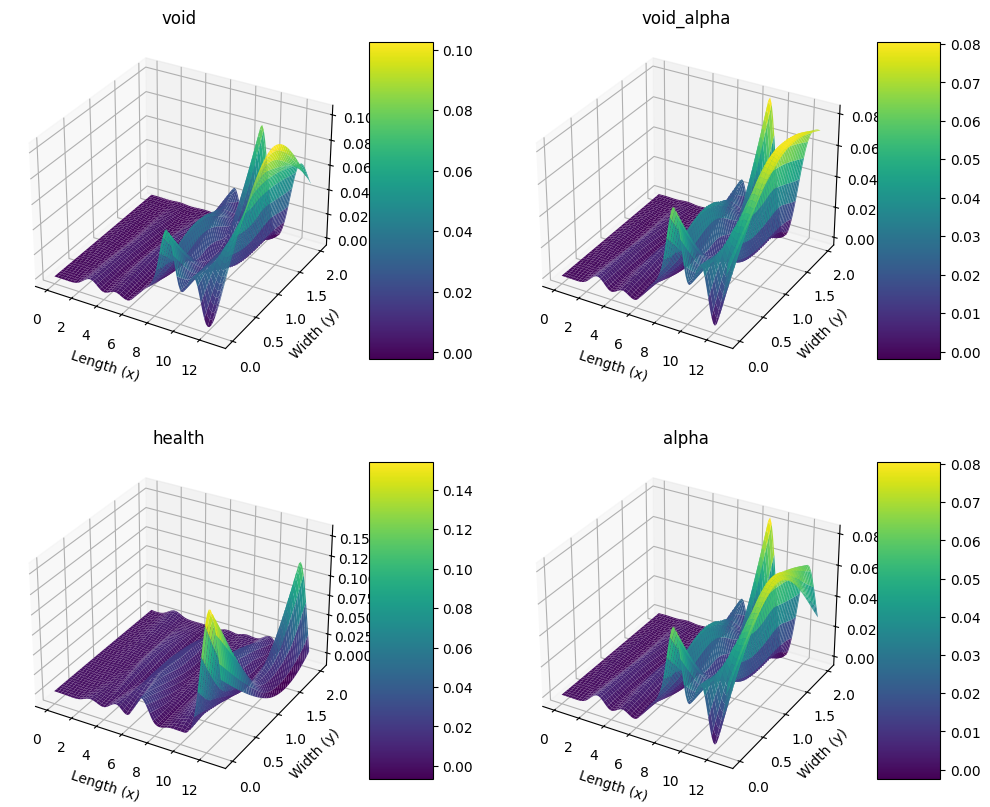

*************** 2D ***************


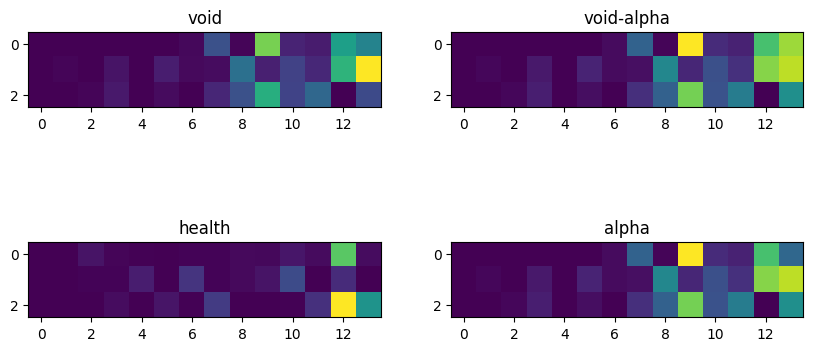

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


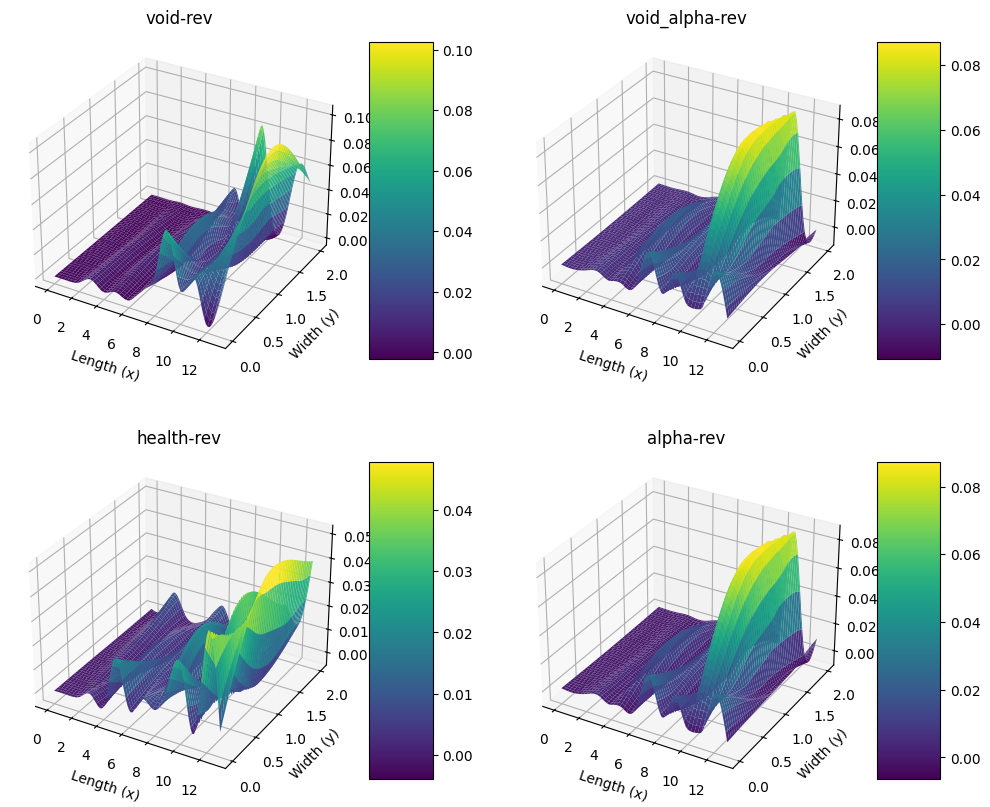

*************** 2D ***************


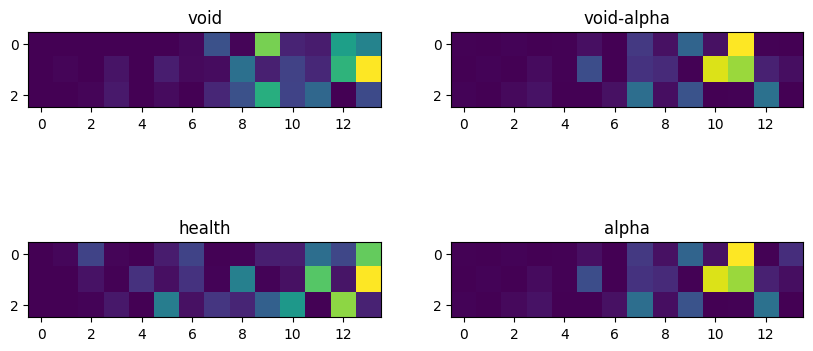

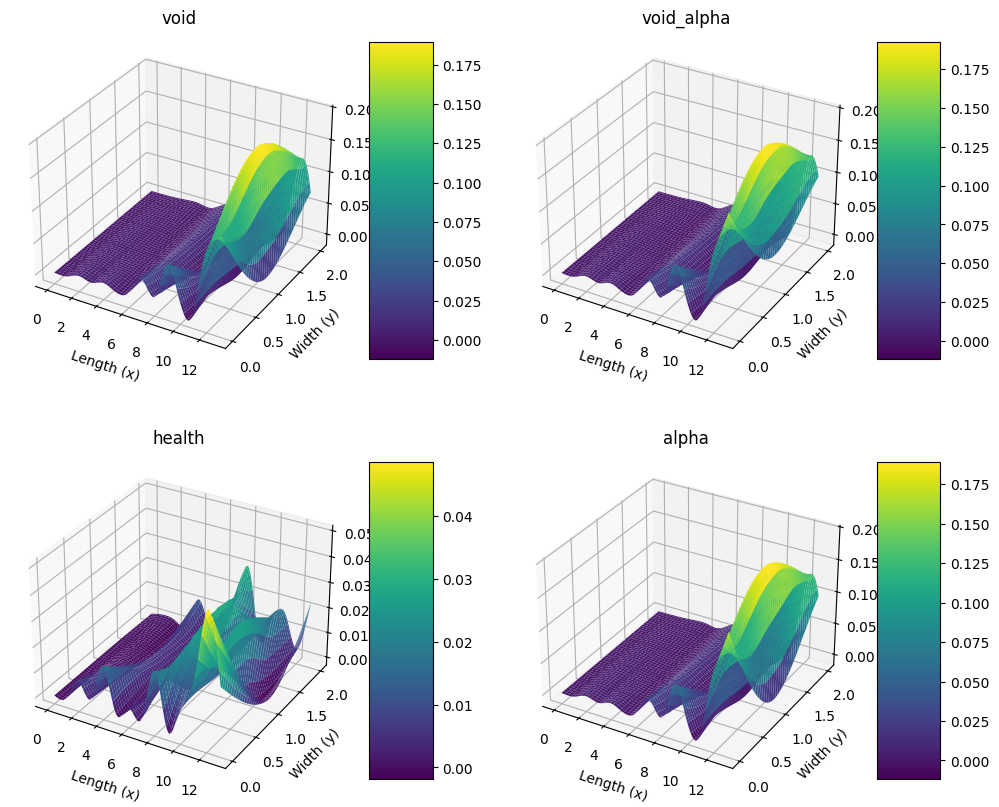

*************** 2D ***************


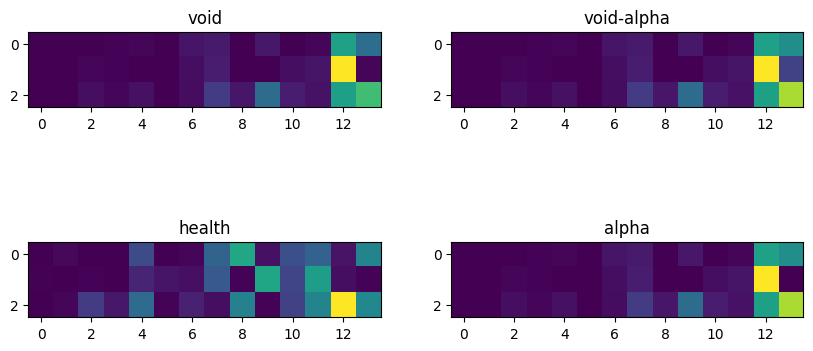

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


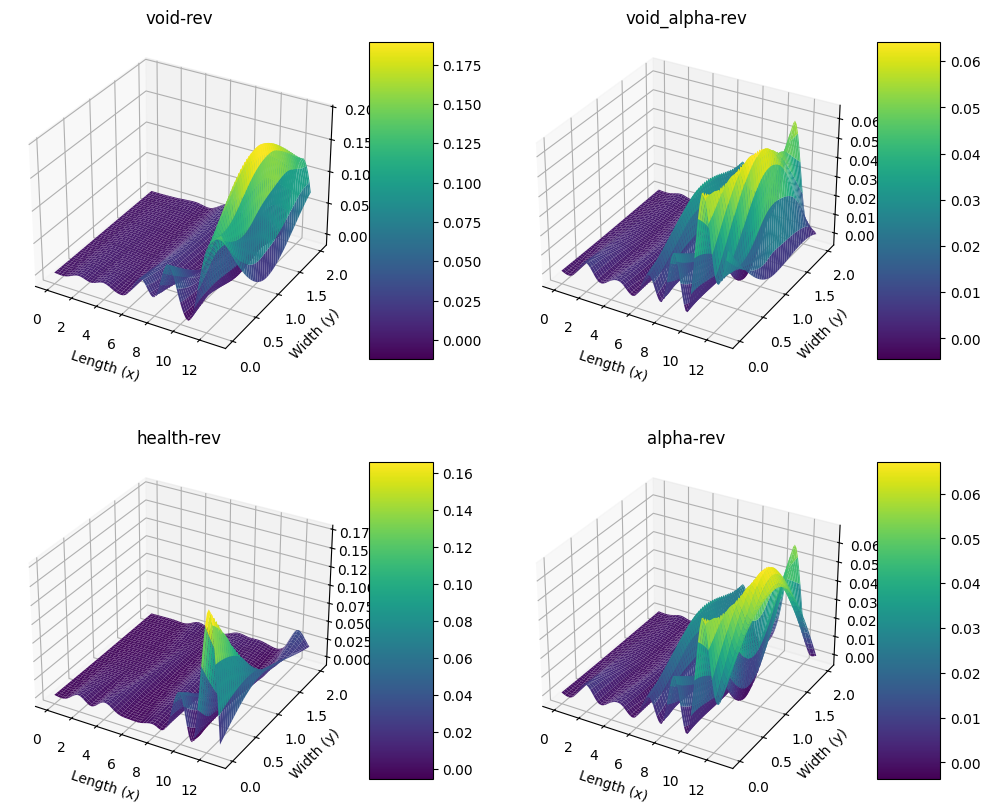

*************** 2D ***************


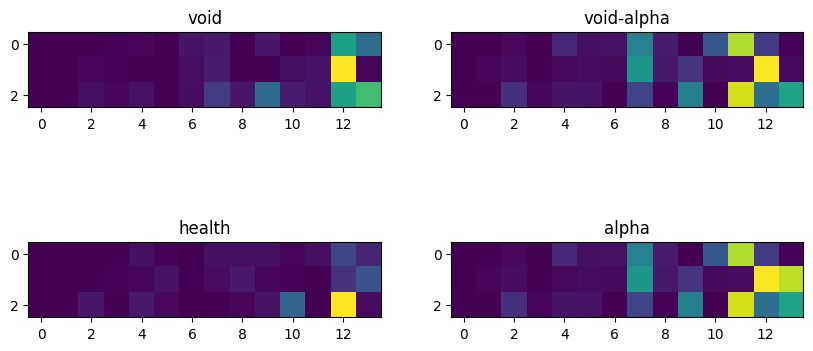

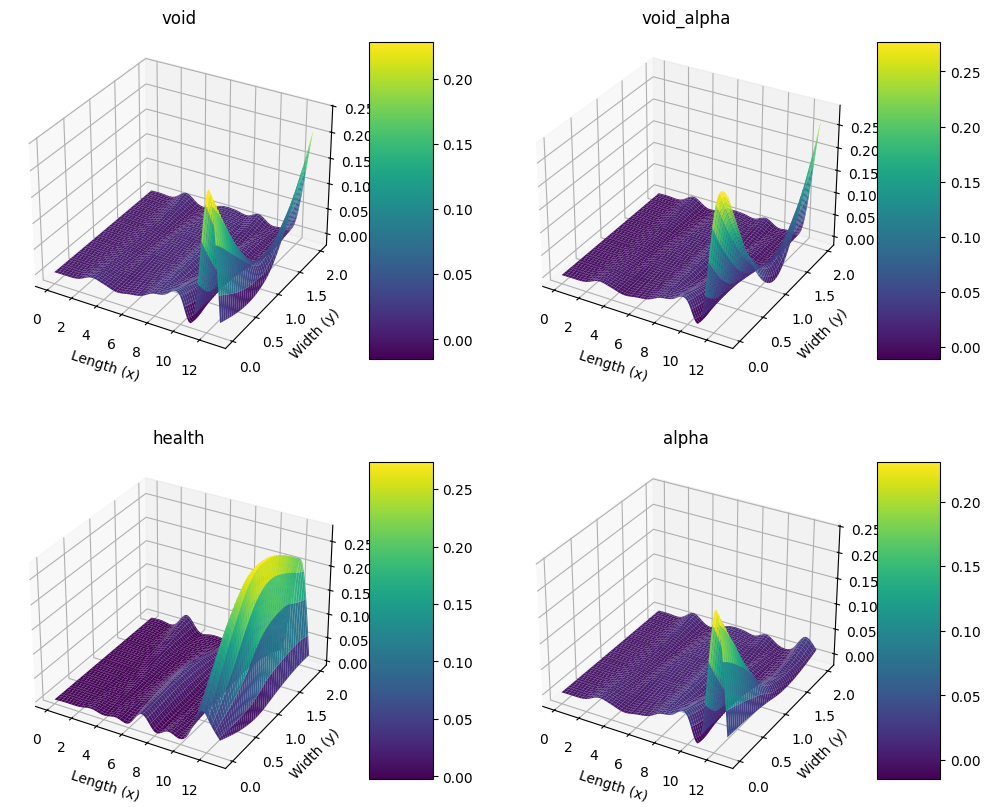

*************** 2D ***************


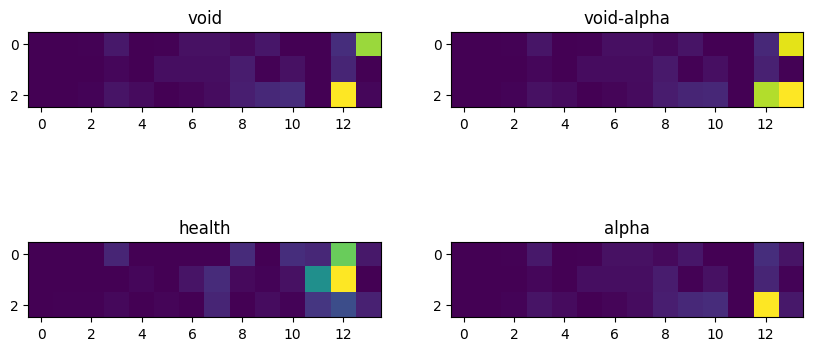

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


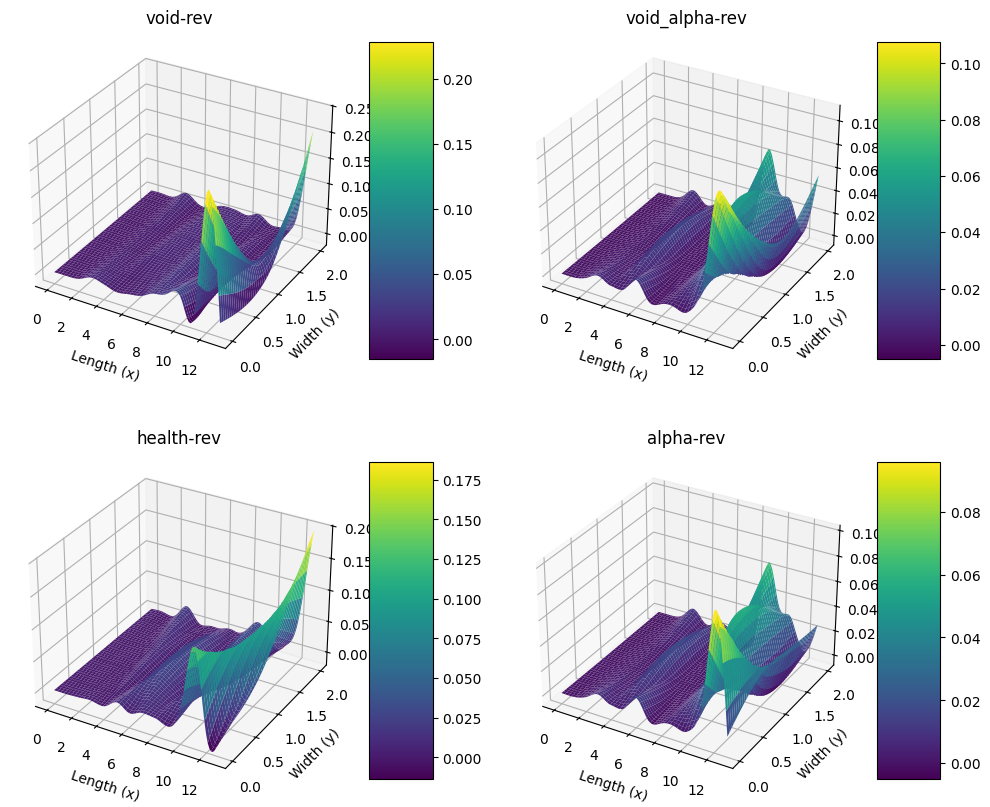

*************** 2D ***************


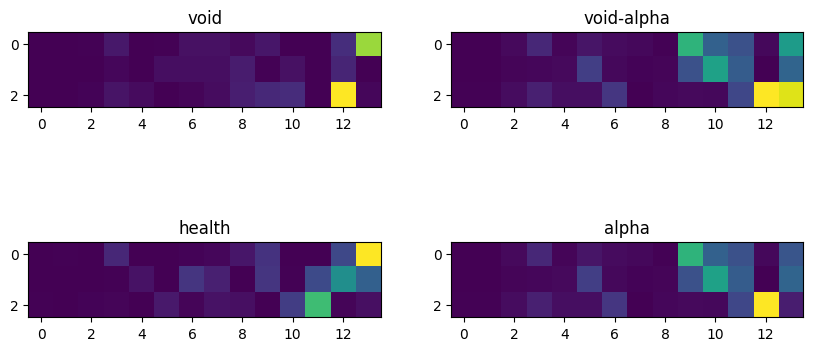

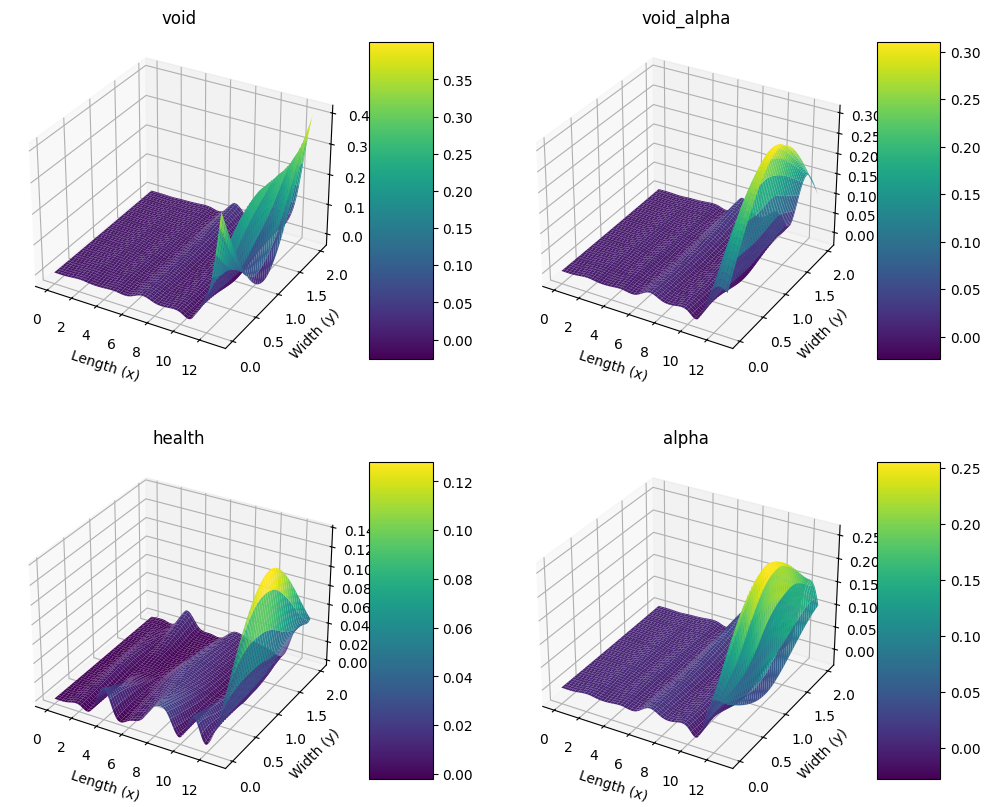

*************** 2D ***************


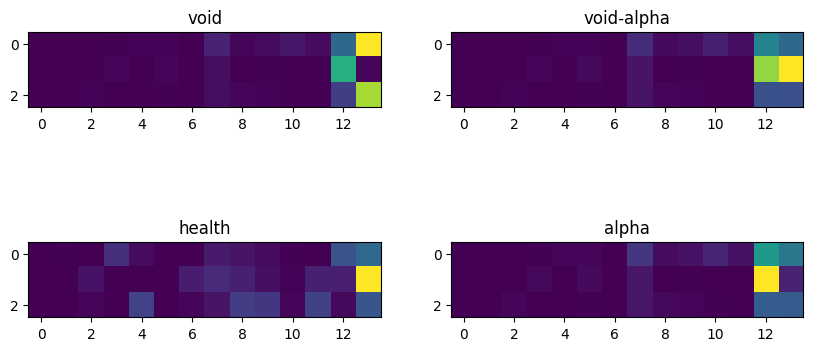

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


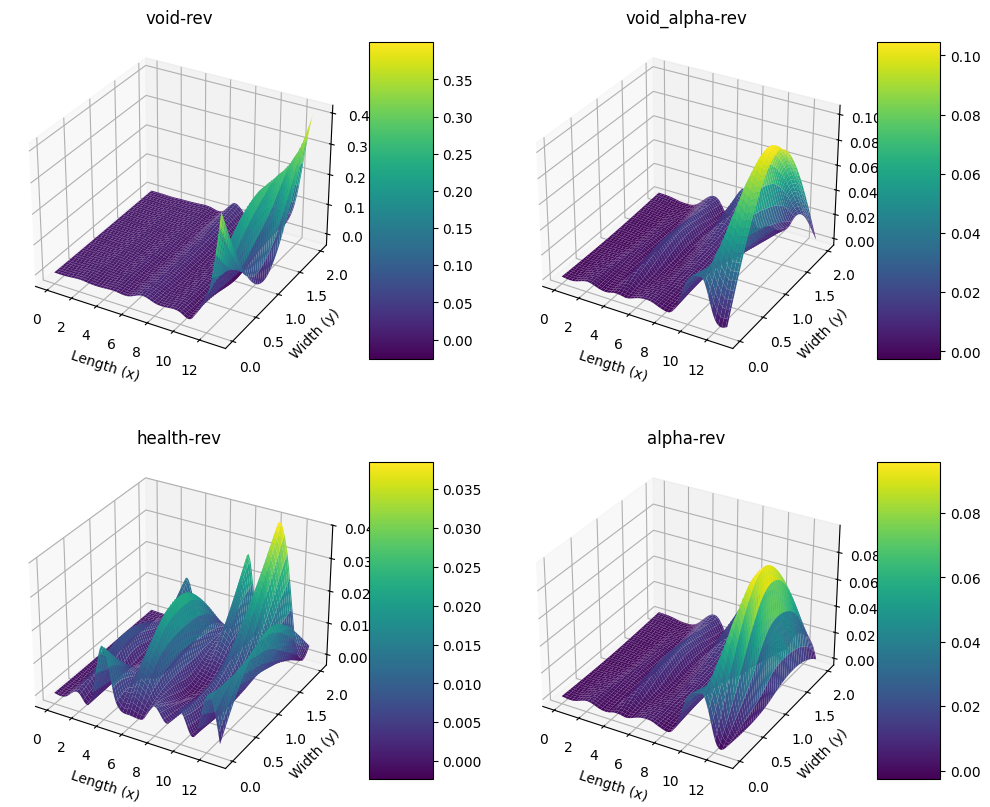

*************** 2D ***************


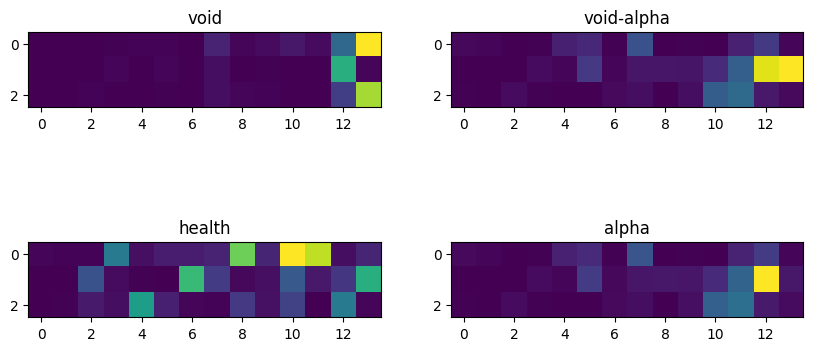

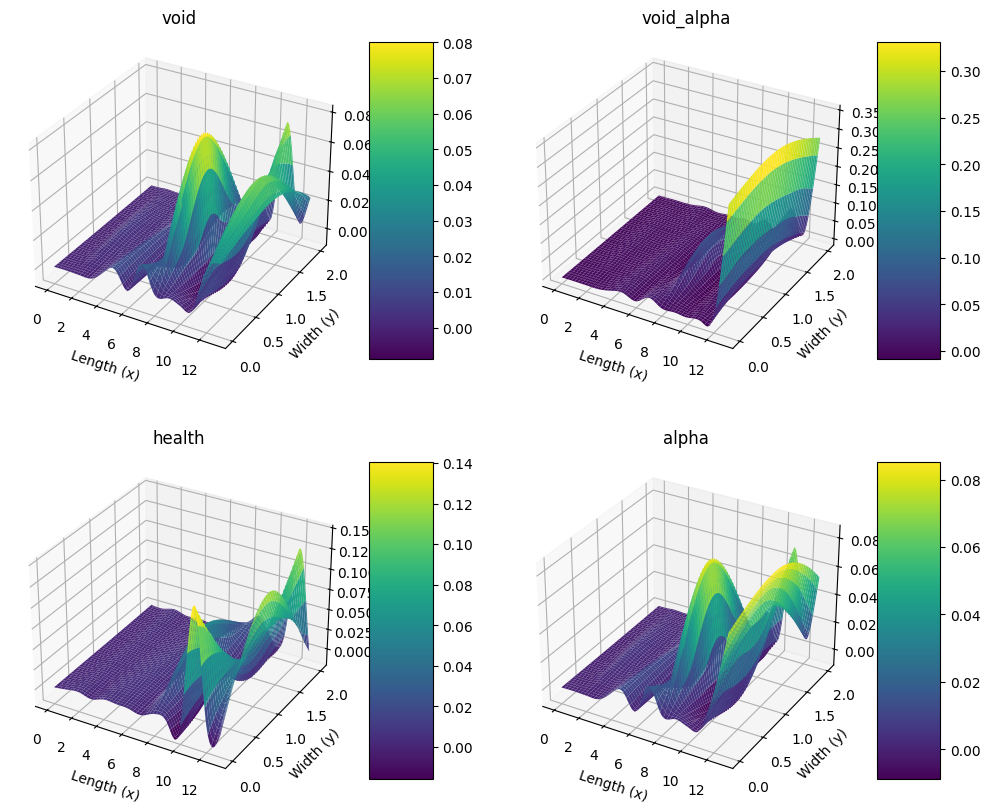

*************** 2D ***************


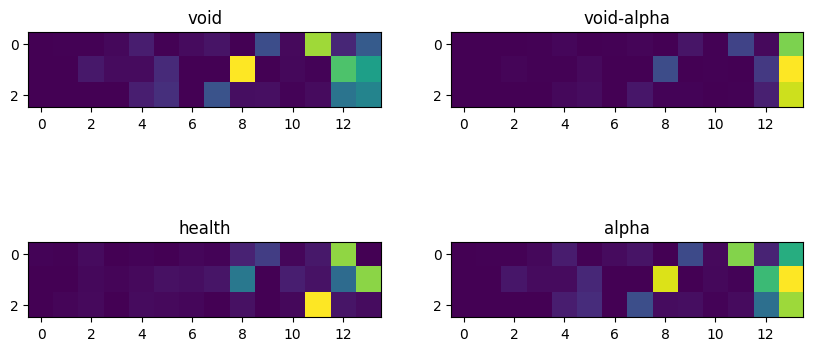

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


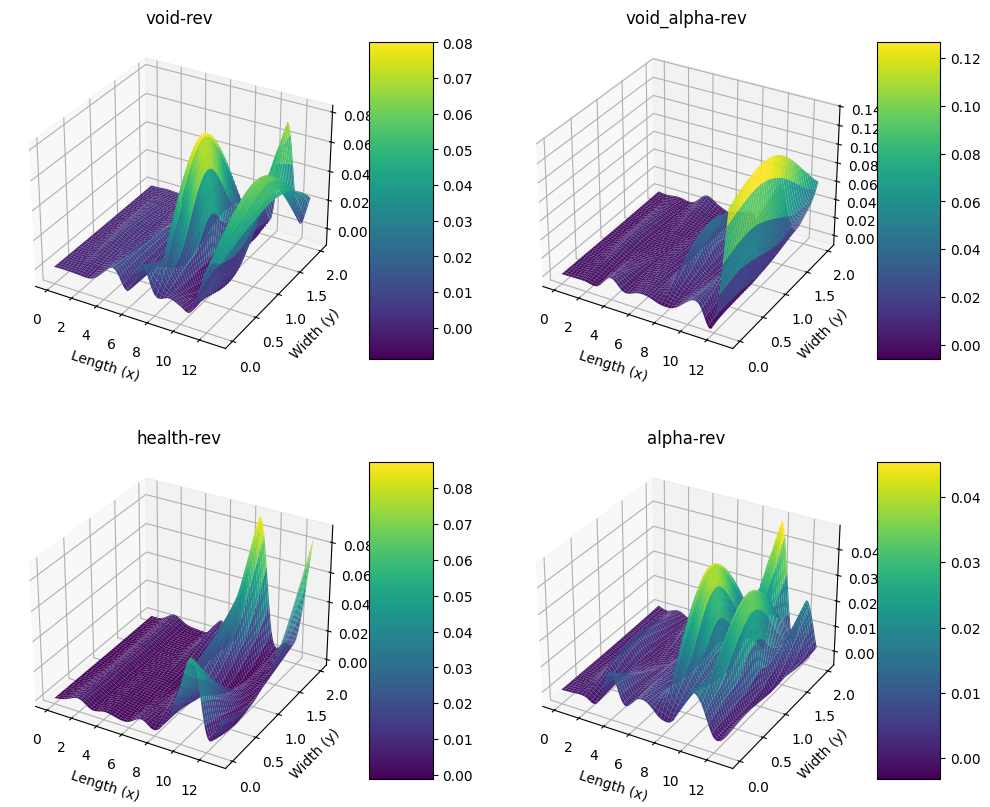

*************** 2D ***************


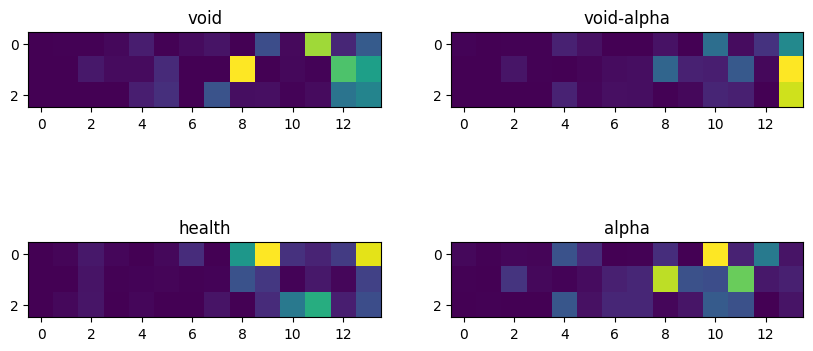

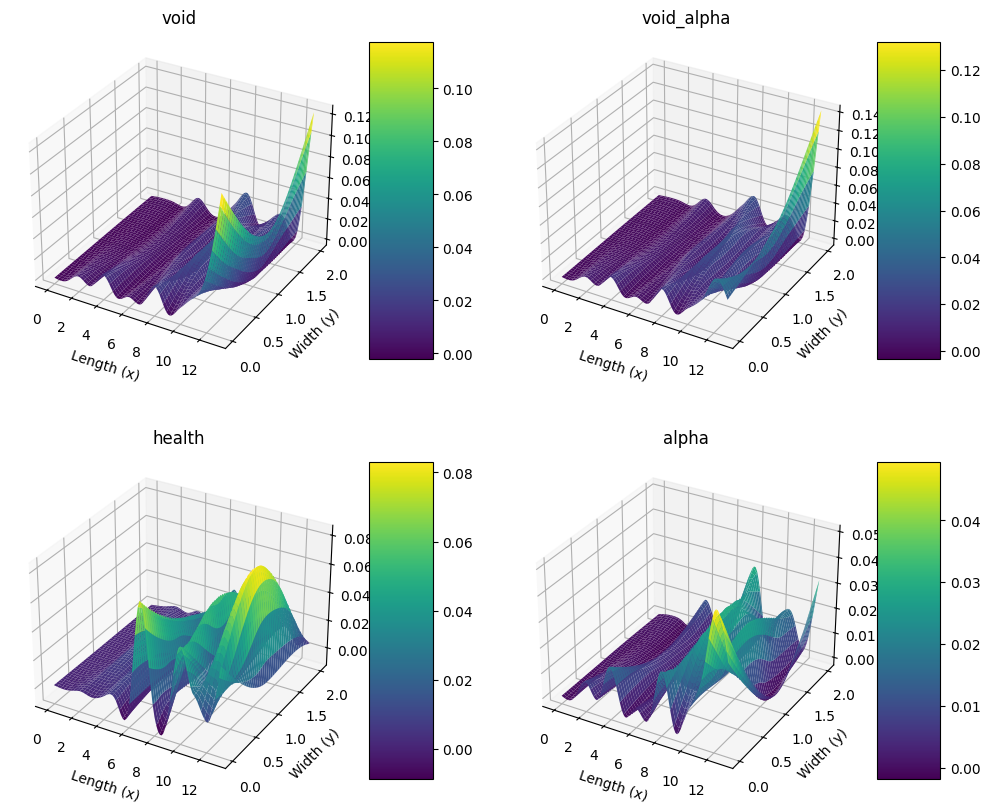

*************** 2D ***************


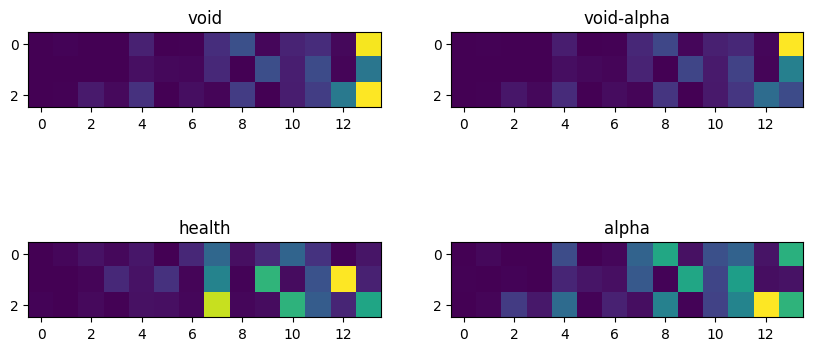

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


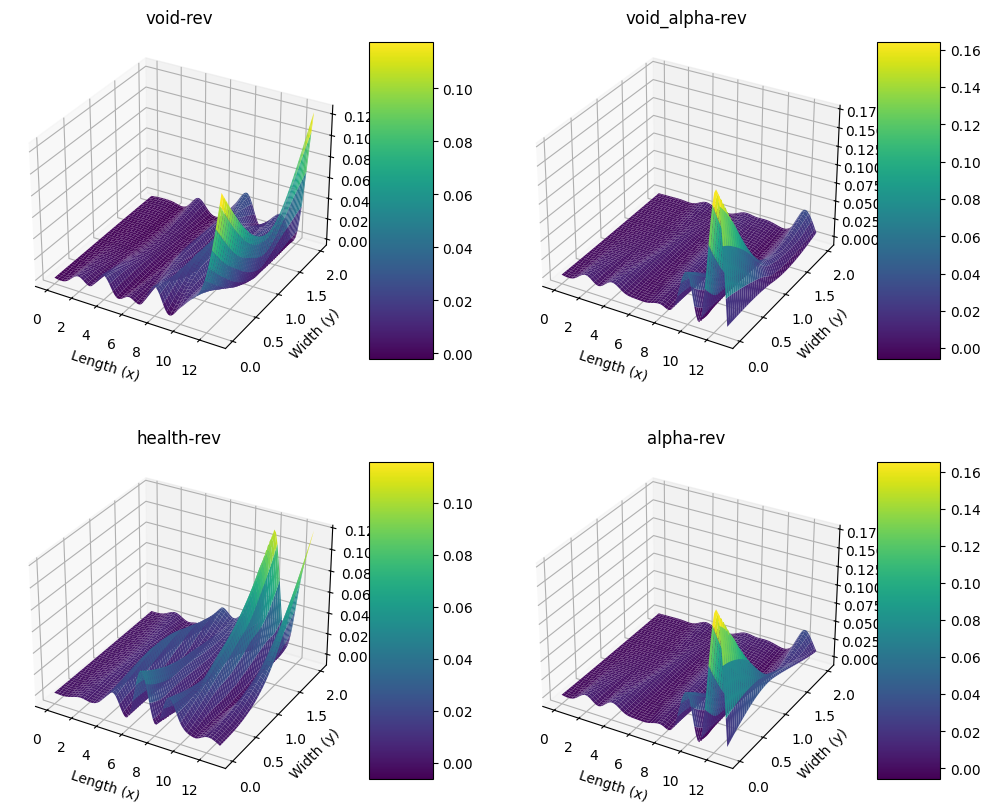

*************** 2D ***************


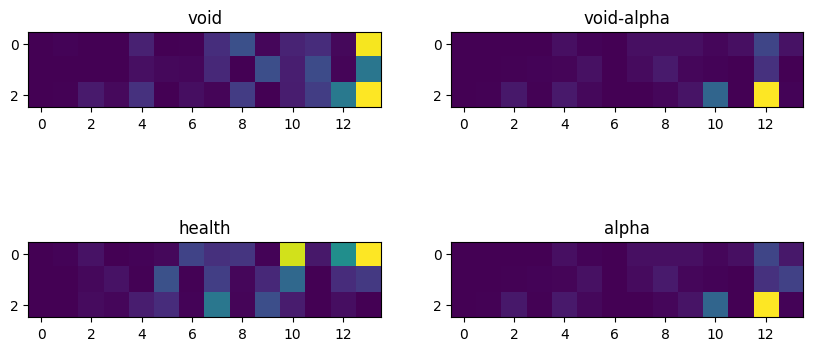

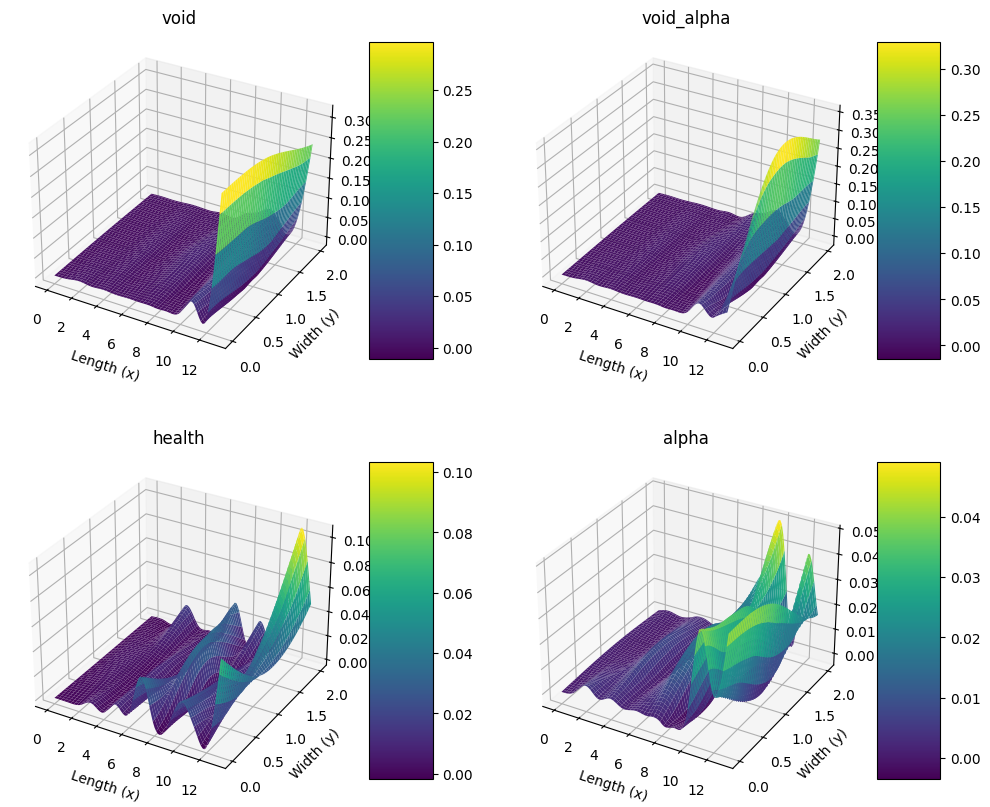

*************** 2D ***************


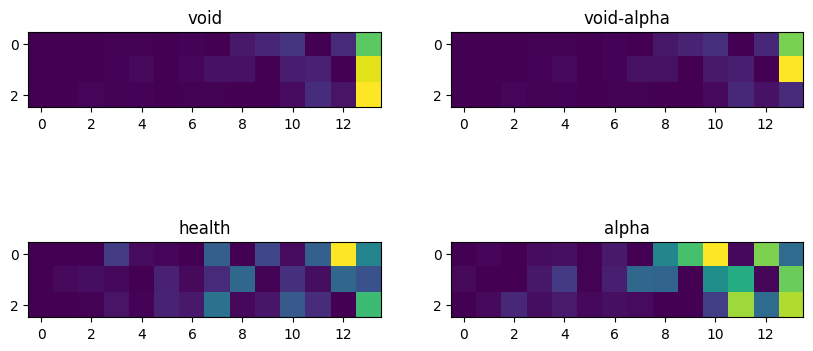

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


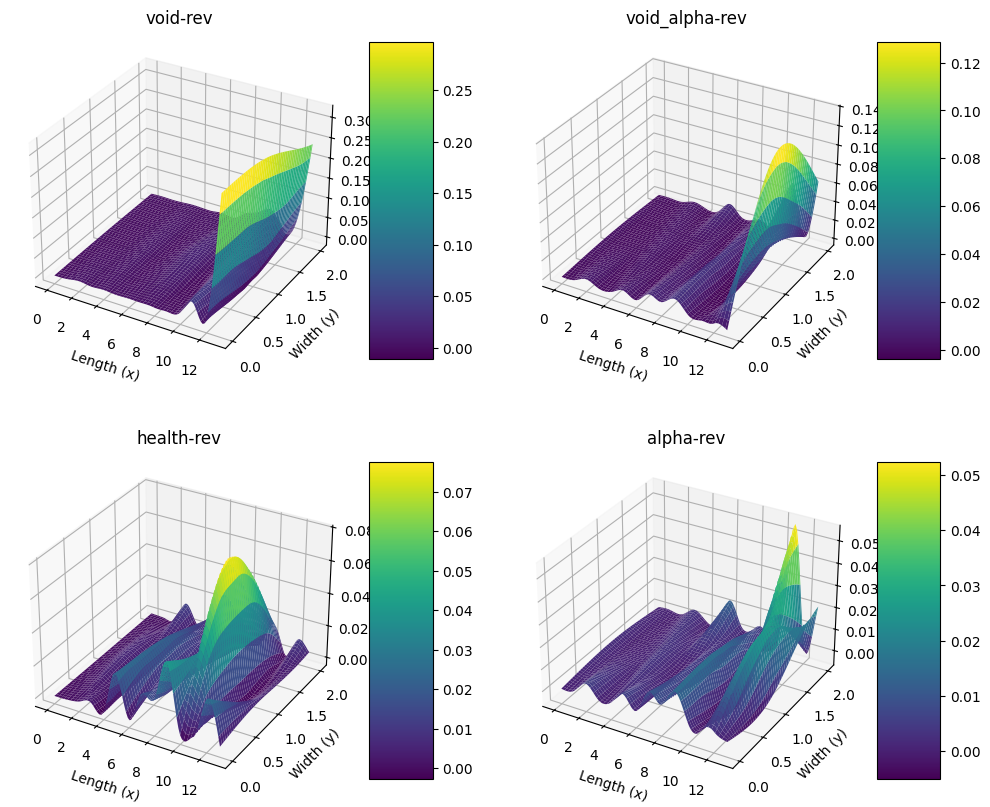

*************** 2D ***************


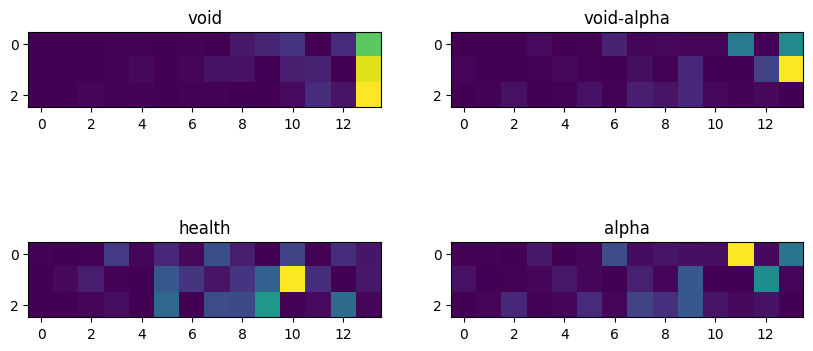

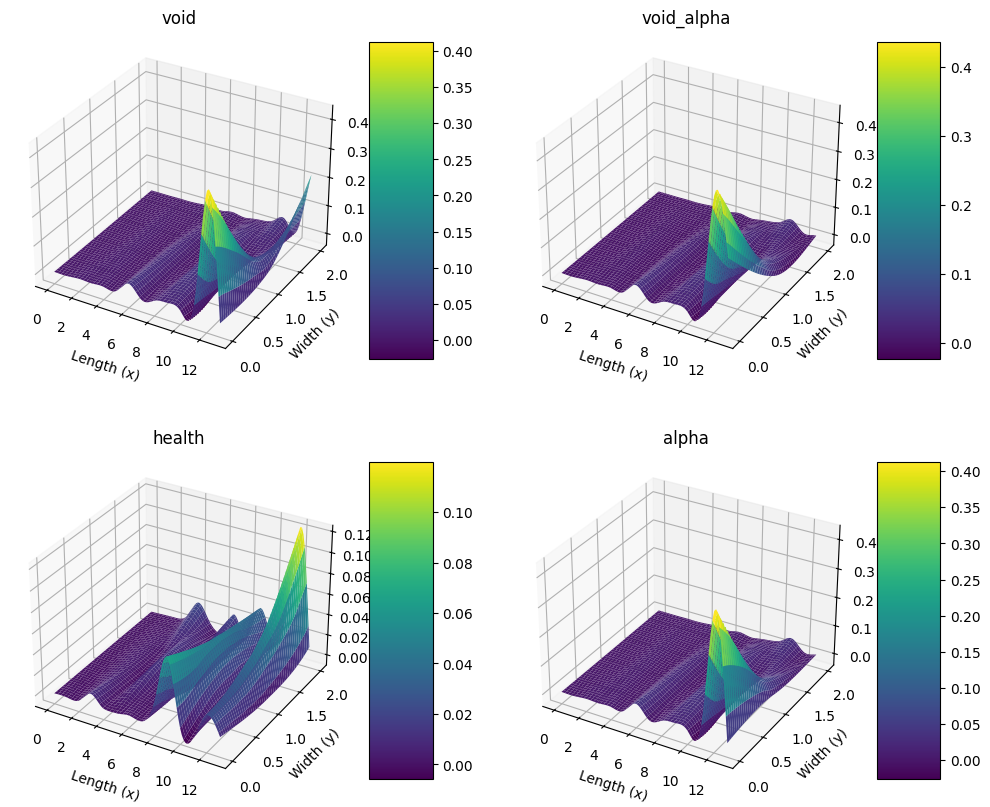

*************** 2D ***************


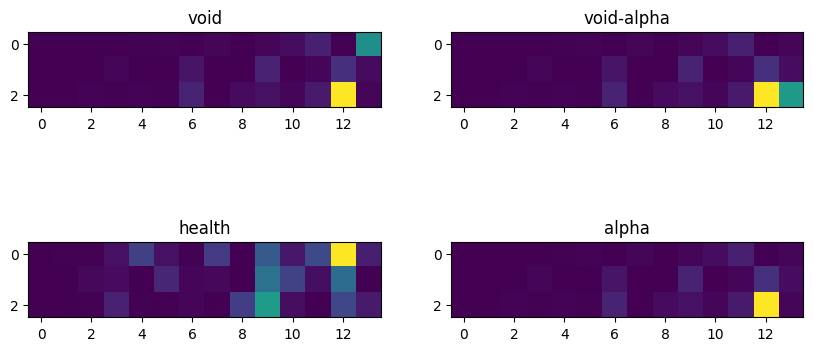

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


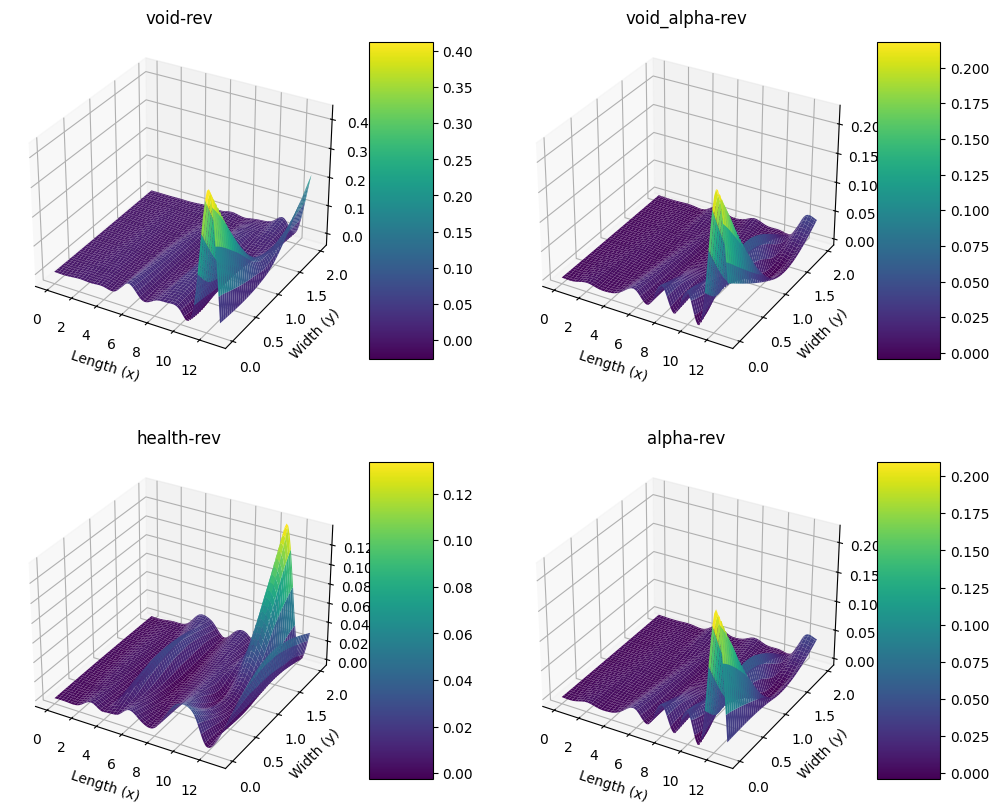

*************** 2D ***************


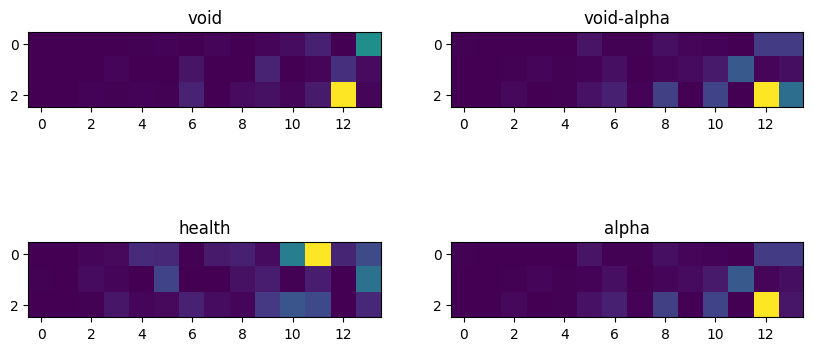

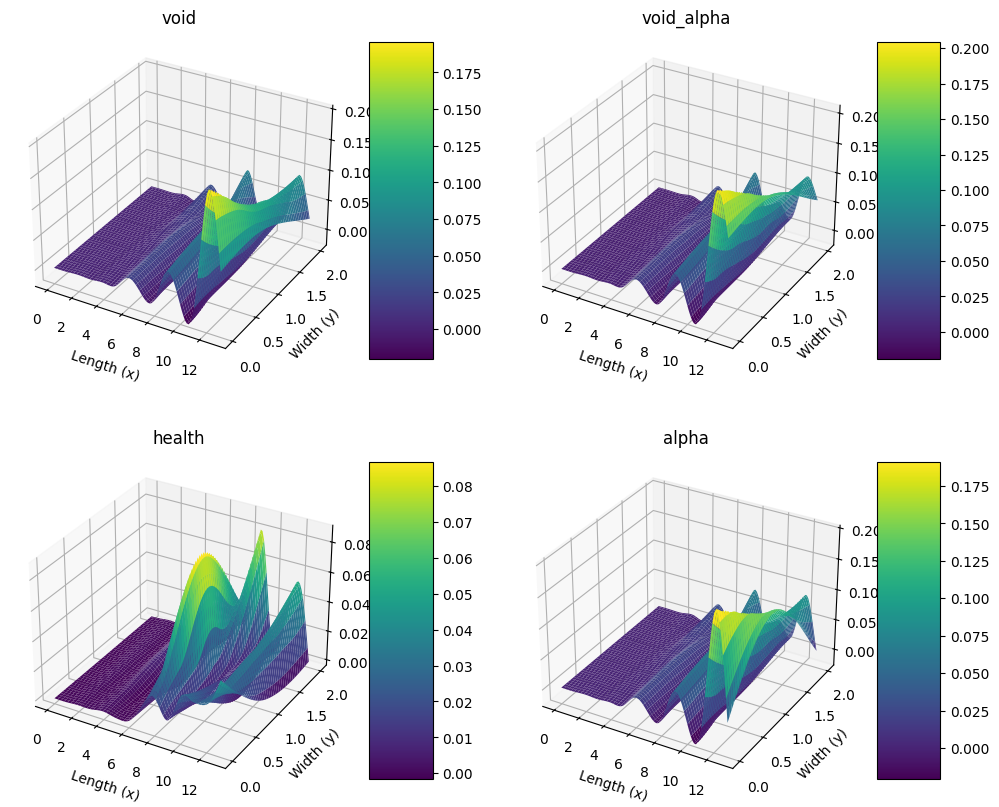

*************** 2D ***************


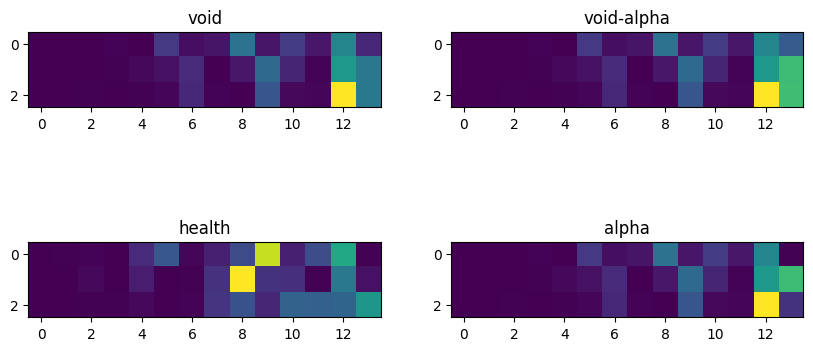

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


KeyboardInterrupt: 

In [23]:
j = 0
for i in range(len(TOTAL_ERROR_PLAIN_ALPHA)):
  multi_plot_error_surface(TOTAL_ERROR_PLAIN_HEALTH[j] ,TOTAL_ERROR_PLAIN_ALPHA[j] , TOTAL_ERROR_PLAIN_VOID[j] , TOTAL_ERROR_PLAIN_VOID_ALPHA[j] ,title=["health","alpha","void","void_alpha"])

  if j > 200:
    break

  print("//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")
  multi_plot_error_surface(rev_TOTAL_ERROR_PLAIN_HEALTH[j] ,rev_TOTAL_ERROR_PLAIN_ALPHA[j] , rev_TOTAL_ERROR_PLAIN_VOID[j] , rev_TOTAL_ERROR_PLAIN_VOID_ALPHA[j] ,title=["health-rev","alpha-rev","void-rev","void_alpha-rev"])
  j += 5


In [24]:
df_forward = pd.DataFrame(Total_Feature , columns =["mse","mean" , "max" , "std" , "last" , "min"] )

In [25]:
df_forward['label'] = Total_Label_Feature

In [28]:
df_forward.drop(['last'] , axis = 1 , inplace = True )

In [29]:
df_forward_corr = df_forward.corr()

In [30]:
df_forward_corr

mse      mean       max       std       min     label
mse    1.000000  0.028582  0.828302  0.925982  0.032511  0.500453
mean   0.028582  1.000000 -0.044958 -0.040334 -0.007519 -0.519034
max    0.828302 -0.044958  1.000000  0.966038 -0.015141  0.430425
std    0.925982 -0.040334  0.966038  1.000000 -0.005419  0.477326
min    0.032511 -0.007519 -0.015141 -0.005419  1.000000 -0.007086
label  0.500453 -0.519034  0.430425  0.477326 -0.007086  1.000000

In [ ]:
df_forward = pd.DataFrame(Total_Feature , columns =["mse","mean" , "max" , "std" , "last" , "min"] )

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [44]:
data_train  = df_forward.drop(['label'] , axis = 1 )
label_train = df_forward['label']

In [52]:
scaler = StandardScaler()

In [53]:
x_d_train , x_d_test , y_d_train , y_d_test = train_test_split(data_train , label_train , test_size = 0.2 , random_state = 42 )
x_d_train_s = scaler.fit_transform(x_d_train)
x_d_test_S = scaler.transform(x_d_test)

In [54]:
model_svc = SVC()
model_svc.fit(x_d_train_s , y_d_train)
y_d_pred = model_svc.predict(x_d_test_S)
print(accuracy_score(y_d_pred , y_d_test ))


0.55


In [35]:
df_backward = pd.DataFrame(rev_Total_Feature , columns =["mse","mean" , "max" , "std" , "last" , "min"] )

In [37]:
df_backward['label'] = rev_Total_Label_Feature

In [39]:
df_backward.drop(['last'] , axis = 1 , inplace = True )

In [40]:
df_backward_corr = df_backward.corr()

In [41]:
df_backward_corr

mse      mean       max       std       min     label
mse    1.000000  0.367193  0.835616  0.927156 -0.019486  0.211803
mean   0.367193  1.000000  0.240018  0.276695  0.002658 -0.153121
max    0.835616  0.240018  1.000000  0.969264 -0.033822  0.187390
std    0.927156  0.276695  0.969264  1.000000 -0.040061  0.198649
min   -0.019486  0.002658 -0.033822 -0.040061  1.000000 -0.015978
label  0.211803 -0.153121  0.187390  0.198649 -0.015978  1.000000

In [42]:
df_backward

mse      mean       max       std           min label
0    0.379976  0.009047  0.052048  0.013137  2.323638e-05     0
1    0.636473  0.015154  0.164149  0.032141  3.081996e-07     0
2    0.511077  0.012169  0.061949  0.015865  1.480381e-06     0
3    0.655151  0.015599  0.096245  0.027586  8.077431e-07     0
4    0.386716  0.009208  0.074282  0.016564  3.185638e-07     0
..        ...       ...       ...       ...           ...   ...
391  0.482398  0.010330  0.105452  0.021497  3.927831e-05     3
392  0.531960  0.010330  0.145416  0.028051  4.935299e-07     3
393  0.437915  0.010330  0.184213  0.030973  2.025116e-07     3
394  0.337585  0.010330  0.043481  0.011229  2.306657e-05     3
395  0.835850  0.010330  0.375191  0.060997  4.614606e-08     3

[396 rows x 6 columns]